### Kaggle Dtaset Beer Reviews analyze

### Goles:

Which beer style is most favoured around the world and which have the top ratings?

Which beers have the good quality (assumed the quality has liniear relation with taste) irrespective of the popularity of beer as number of reviews?

Does the aroma of the beer is also proportionally related to its higher ratings?

If you had to pick 10 beers to recommend using only the data in this dataset, which would you pick?

In [25]:
#importing libraries
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
import seaborn as sns

In [26]:
beer_df = pd.read_csv('beer_reviews.csv')

In [27]:
beer_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [28]:
#shape of beer data
print("Number of reviews: ", beer_df.shape[0])
print("Number of features: ", beer_df.shape[1])
print("Total number of breweries; ", len(beer_df['brewery_name'].value_counts()))
print("Total number of beer style; ", len(beer_df['beer_style'].value_counts()))
print("Total number of beer names; ", len(beer_df['beer_name'].value_counts()))

Number of reviews:  1586614
Number of features:  13
Total number of breweries;  5742
Total number of beer style;  104
Total number of beer names;  56857


In [5]:
missing_data_columns = beer_df.isnull().mean().sort_values(ascending=False)*100
missing_data_columns.plot(kind='bar')
missing_data_columns

beer_abv              4.272306
review_profilename    0.021934
brewery_name          0.000945
brewery_id            0.000000
review_time           0.000000
review_overall        0.000000
review_aroma          0.000000
review_appearance     0.000000
beer_style            0.000000
review_palate         0.000000
review_taste          0.000000
beer_name             0.000000
beer_beerid           0.000000
dtype: float64

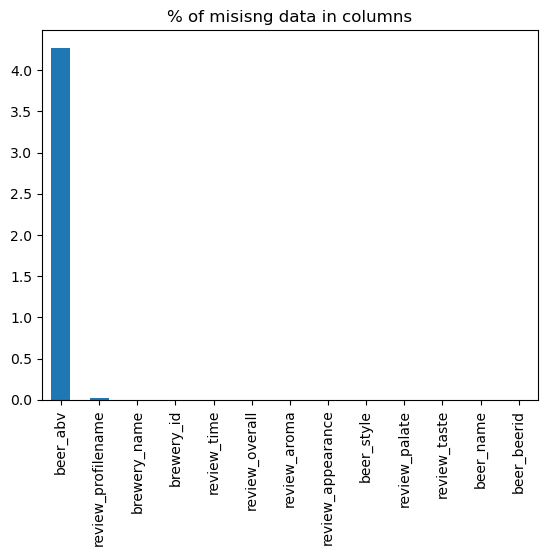

In [6]:
plt.title('% of misisng data in columns')
plt.show()

#### 'beer_abv' columns has the most missing values. And we won't be needin this column values for our analysis. All other columns seems to be fine with very minimal or zero missing data.

In [7]:
# drop column beer_abv 
beer_df = beer_df.drop('beer_abv', axis=1)
beer_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,64883


#### Our primary columns are - 'brewery_name', 'beer_name', 'review_taste', 'review_overall', 'review_taste', 'review_aroma' and 'beer_style'. So removing the rows which have missing data in the listed rows.

In [8]:
# missing data by rows
beer_row_clean = beer_df.dropna(subset=['brewery_name', 'beer_name', 'review_taste', 'review_overall', 'review_taste', 'review_aroma','beer_style'], how='any')
beer_row_clean.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,64883


In [9]:
beer_row_clean.shape

(1586599, 12)

In [10]:
# MOst favored beer type all around the world that have top rating in reviews
beer_style_count = beer_row_clean.groupby('beer_beerid').agg(dict(beer_style='first', brewery_name ='first', review_overall= 'first', review_aroma='first', review_taste='first', beer_name='first')).reset_index()
beer_style_count

,beer_beerid,beer_style,brewery_name,review_overall,review_aroma,review_taste,beer_name
0,3,American IPA,Yellow Rose Brewing Company,4.5,4.5,4.5,Cactus Queen IPA
1,4,American Stout,Yellow Rose Brewing Company,3.0,4.5,2.5,Wildcatter's Crude Stout
2,5,Vienna Lager,Abita Brewing Co.,4.0,3.5,4.0,Amber
3,6,English Brown Ale,Abita Brewing Co.,4.0,3.5,3.5,Turbodog
4,7,Fruit / Vegetable Beer,Abita Brewing Co.,3.5,3.0,3.0,Purple Haze
...,...,...,...,...,...,...,...
66039,77313,American Blonde Ale,Aass Brewery,3.0,3.0,3.0,Aass Gourmet Pale Ale
66040,77314,American Brown Ale,Lervig Aktiebryggeri AS,3.5,3.5,4.0,Betty Brown Norwegian Brwon Ale
66041,77315,Witbier,Einstök Ölgerð,3.5,4.5,3.5,Icelandic White Beer
66042,77316,American IPA,Eddyline Restaurant & Brewery,3.5,3.5,3.5,Crank Yanker IPA


In [11]:
beer_style_number = beer_style_count['beer_style'].value_counts()
print("Total number of beer types: ", len(beer_style_number))
beer_style_number

Total number of beer types:  104


American IPA                       3610
American Pale Ale (APA)            3349
American Amber / Red Ale           2512
American Porter                    2198
Fruit / Vegetable Beer             1837
                                   ... 
Kvass                                44
Gose                                 33
Sahti                                28
Bière de Champagne / Bière Brut      20
Faro                                 19
Name: beer_style, Length: 104, dtype: int64

#### There are thousands of ifferent beer style exist in this data set. For the ease of analising the dataset, we condider the top 10 that have more tahn 30K reviews.

In [12]:
print("Beer with top ratings:----- \n{}".format(beer_style_number[:10]))

Beer with top ratings:----- 
American IPA                      3610
American Pale Ale (APA)           3349
American Amber / Red Ale          2512
American Porter                   2198
Fruit / Vegetable Beer            1837
Hefeweizen                        1724
American Double / Imperial IPA    1549
English Bitter                    1488
Euro Pale Lager                   1479
American Stout                    1426
Name: beer_style, dtype: int64


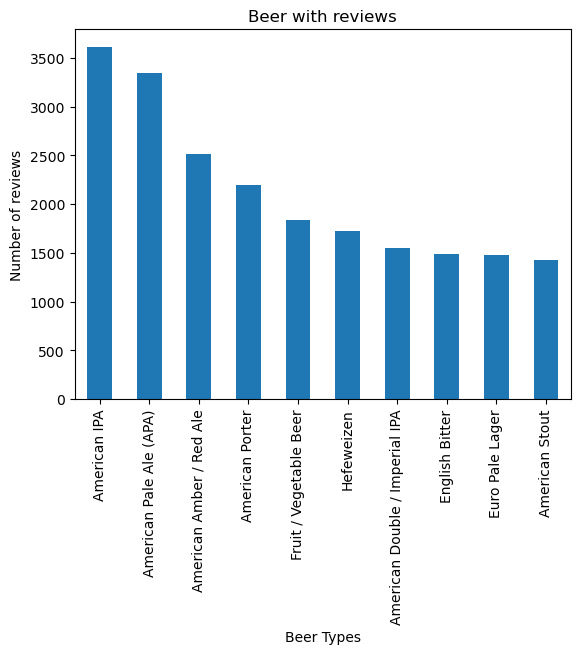

In [13]:
beer_style_number[:10].plot(kind='bar')
plt.title('Beer with reviews')
plt.xlabel('Beer Types')
plt.ylabel('Number of reviews')

plt.show()

In [14]:
beer_style_count.head(10)

,beer_beerid,beer_style,brewery_name,review_overall,review_aroma,review_taste,beer_name
0,3,American IPA,Yellow Rose Brewing Company,4.5,4.5,4.5,Cactus Queen IPA
1,4,American Stout,Yellow Rose Brewing Company,3.0,4.5,2.5,Wildcatter's Crude Stout
2,5,Vienna Lager,Abita Brewing Co.,4.0,3.5,4.0,Amber
3,6,English Brown Ale,Abita Brewing Co.,4.0,3.5,3.5,Turbodog
4,7,Fruit / Vegetable Beer,Abita Brewing Co.,3.5,3.0,3.0,Purple Haze
5,8,American Adjunct Lager,Abita Brewing Co.,3.5,2.5,3.0,Wheat
6,9,American Pale Lager,Abita Brewing Co.,2.5,2.0,2.0,Golden
7,10,Dubbel,Allagash Brewing Company,4.0,3.5,4.0,Allagash Dubbel Ale
8,11,Scottish Ale,Yakima Brewing Co. / Bert Grant's Ales,4.0,3.5,3.5,Bert Grant's Scottish Ale
9,12,Russian Imperial Stout,Yakima Brewing Co. / Bert Grant's Ales,3.5,3.5,3.5,Bert Grant's Imperial Stout


In [15]:
# Beer Quality review Analyse (the assumption is that quality has linear relation with the taste for the reviewers)
beer_quality = beer_style_count.groupby('beer_style').agg(dict(review_taste='mean')).reset_index()
beer_quality.sort_values('review_taste', ascending=False)

,beer_style,review_taste
75,Lambic - Unblended,4.000000
11,American Double / Imperial Stout,3.975910
89,Russian Imperial Stout,3.970656
101,Wheatwine,3.963415
63,Gueuze,3.957447
...,...,...
13,American Malt Liquor,2.648276
76,Light Lager,2.636725
1,American Adjunct Lager,2.583260
64,Happoshu,2.563380


C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


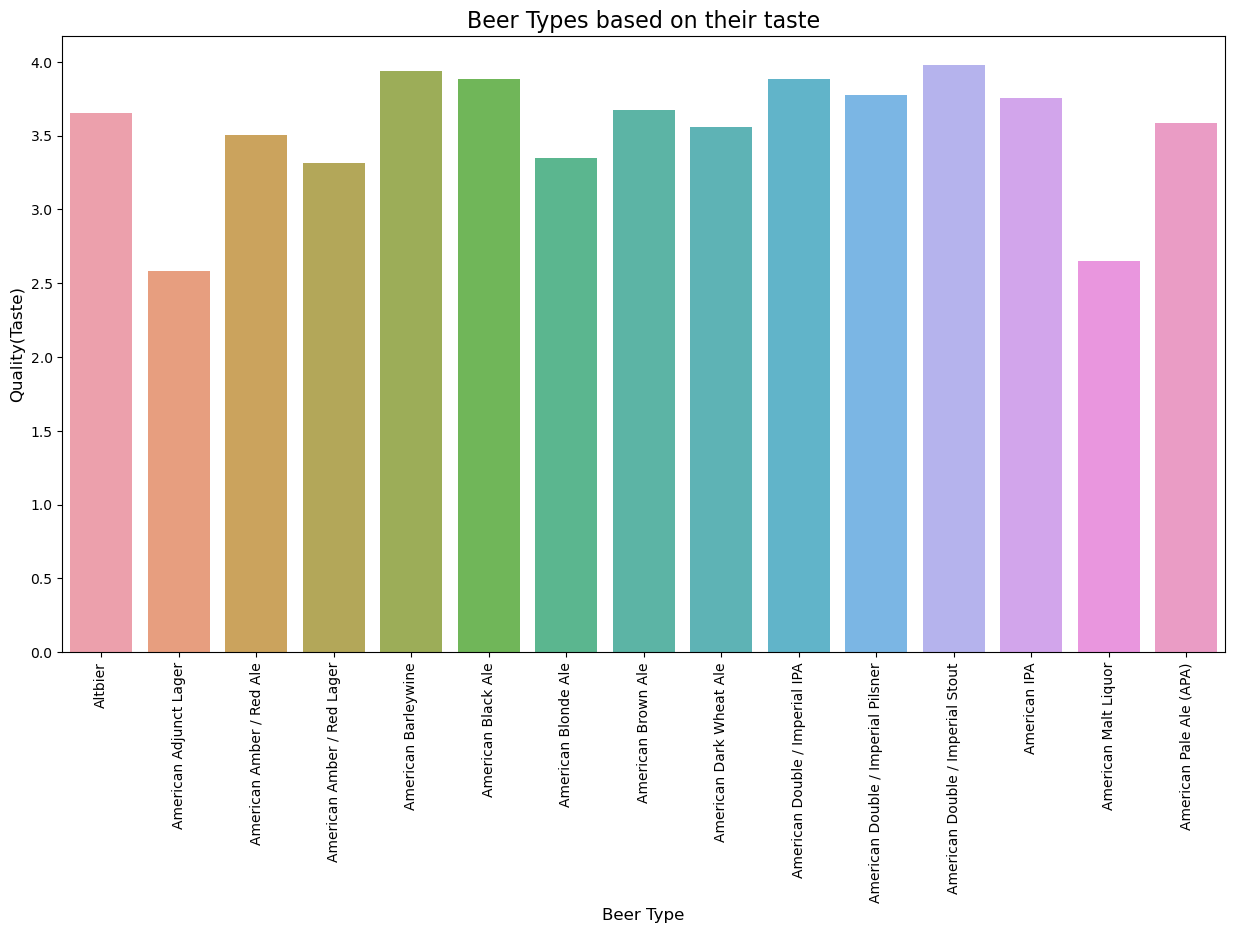

In [16]:
beer_quality = beer_quality[:15]
plt.figure(figsize=(15,8))
sns.barplot(beer_quality['beer_style'], beer_quality['review_taste'], alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel("Beer Type", fontsize=12)
plt.ylabel("Quality(Taste)", fontsize=12)
plt.title("Beer Types based on their taste", fontsize=16)
plt.show()

#### Analysis:
If we compare the above two plots as 'Beer with top ratings' vs 'Beer Types based on their taste'. Top 5 brands in first graph: (American IPA, American Pale Ale (APA) , American Amber / Red Ale, American Porter, Fruit / Vegetable Beer)

few Top beer brands in Quality wise : -- (American Double / Imperial Stout, American Barleywine, American Black Ale ...)

Both have different listings. Which tells us that even if a famous beer is consumed or prepared by most brewries wordwide, the tastes of other less famous beers can be better in quality or taste. Quality of beer can be dependent on other features too, such as aroma, appearence, overall review.

In [17]:
# the proportional relation of beer aroma and it's rating
beer_aroma = beer_style_count.groupby('beer_style').agg(dict(review_aroma='mean')).round(3).reset_index()
beer_aroma.sort_values('review_aroma', ascending=False,)

,beer_style,review_aroma
75,Lambic - Unblended,4.021
11,American Double / Imperial Stout,3.957
89,Russian Imperial Stout,3.925
41,Eisbock,3.920
20,American Wild Ale,3.911
...,...,...
13,American Malt Liquor,2.645
77,Low Alcohol Beer,2.593
76,Light Lager,2.583
64,Happoshu,2.521


In [18]:
#List of beer aroma's
beer_aroma.sort_values('review_aroma', ascending=False,)[:30]

,beer_style,review_aroma
75,Lambic - Unblended,4.021
11,American Double / Imperial Stout,3.957
89,Russian Imperial Stout,3.925
41,Eisbock,3.920
20,American Wild Ale,3.911
63,Gueuze,3.910
101,Wheatwine,3.907
4,American Barleywine,3.906
86,Quadrupel (Quad),3.906
23,Belgian IPA,3.906


In [19]:
#Create a scatter plot for beer aroma reviews 
beer_aroma = beer_aroma[:30]
sns.set()
ax = sns.scatterplot(x="beer_style", y=beer_aroma["review_aroma"], hue='review_aroma', size=beer_aroma["review_aroma"], sizes=(20, 200), data=beer_aroma)
ax.set_xticklabels(range(50));

<ipython-input-19-7c1da11c3c37>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(50));


In [20]:
# Add the analysied factors together in one table

beer_style_count['total_reviews'] =0
beer_overall_best = beer_style_count.groupby(['beer_style']).agg(dict(brewery_name='first', total_reviews='count', review_overall='median', review_taste='mean', review_aroma='mean')).reset_index()
beer_overall_best.sort_values(by='total_reviews', ascending=False)

,beer_style,brewery_name,total_reviews,review_overall,review_taste,review_aroma
12,American IPA,Yellow Rose Brewing Company,3610,4.00,3.754017,3.732548
14,American Pale Ale (APA),Widmer Brothers Brewing Company,3349,4.00,3.583308,3.538071
2,American Amber / Red Ale,Wachusett Brewing Company,2512,3.50,3.501194,3.420780
17,American Porter,Wachusett Brewing Company,2198,4.00,3.749318,3.729072
60,Fruit / Vegetable Beer,Abita Brewing Co.,1837,3.50,3.321992,3.423789
...,...,...,...,...,...,...
72,Kvass,Kimmels Riga,44,3.50,3.352273,3.261364
62,Gose,Gasthaus & Gosebrauerei Bayerischer Bahnhof,33,4.00,3.893939,3.772727
91,Sahti,Goose Island Beer Co.,28,3.75,3.767857,3.785714
28,Bière de Champagne / Bière Brut,Brouwerij De Landtsheer NV,20,3.75,3.825000,3.750000


In [21]:
# top 10 best taste Beers in the world

beer_overall_best.sort_values(by='review_taste', ascending=False)[:10]

,beer_style,brewery_name,total_reviews,review_overall,review_taste,review_aroma
75,Lambic - Unblended,Brasserie Cantillon,71,4.0,4.000000,4.021127
11,American Double / Imperial Stout,Redhook Ale Brewery,934,4.0,3.975910,3.957173
89,Russian Imperial Stout,Yakima Brewing Co. / Bert Grant's Ales,869,4.0,3.970656,3.924626
101,Wheatwine,Marin Brewing Company,123,4.0,3.963415,3.906504
63,Gueuze,Brouwerij Boon,94,4.0,3.957447,3.909574
41,Eisbock,Beer Works,69,4.0,3.949275,3.920290
4,American Barleywine,Smuttynose Brewing Company,832,4.0,3.936899,3.906250
84,Old Ale,Ipswich Ale Brewery,349,4.0,3.922636,3.840974
20,American Wild Ale,Russian River Brewing Company,719,4.0,3.917942,3.910987
23,Belgian IPA,Brouwerij Van Steenberge N.V.,302,4.0,3.900662,3.905629
